In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller , acf ,pacf
from statsmodels.tsa.arima_model import ARIMA
import math 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("AirPassengers.csv")

In [3]:
data.head()


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data.shape

(144, 2)

In [5]:
data['Month'].head()

0    1949-01
1    1949-02
2    1949-03
3    1949-04
4    1949-05
Name: Month, dtype: object

In [6]:
data['Month'] = data['Month'].apply(lambda x : dt(int(x[:4]), int(x[5:]) , 15))
data = data.set_index('Month')
data.head(9)

,#Passengers
Month,
1949-01-15,112
1949-02-15,118
1949-03-15,132
1949-04-15,129
1949-05-15,121
1949-06-15,135
1949-07-15,148
1949-08-15,148
1949-09-15,136


In [7]:
ts = data['#Passengers']

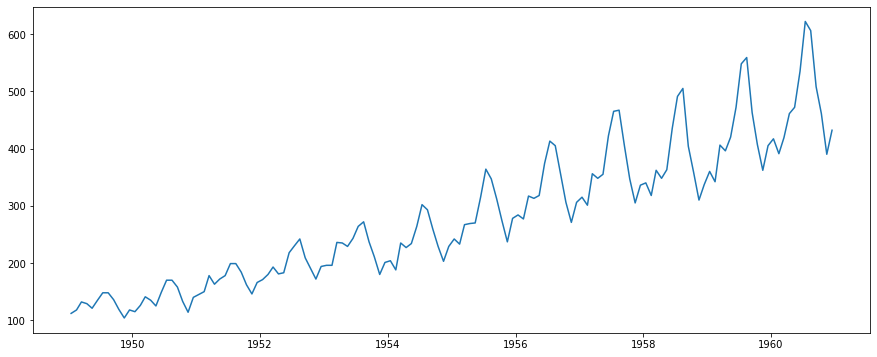

In [8]:
plt.plot(ts)

In [9]:
ts_log = np.log(ts)

In [10]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window = 52 ,center = False).mean()
    rolstd = timeseries.rolling(window = 52 ,center = False).std()
    
    orig = plt.plot(timeseries , color ='blue', label = 'Orignal')
    mean = plt.plot(rolmean , color ='red' , label = "Rolling mean")
    std = plt.plot(rolstd , color ='black' , label = "Rolling Std")
    plt.legend(loc = 'best')
    plt.title('Rolling mead & Standard Deviation')
    plt.show(block =False)
    
    print("Result of Dickey-Fuller Test")
    
    dftest =adfuller(timeseries,autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4],index =['Test Statistics','p-value','#Lags Used','Number of observation used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value %s'%key]=value
        print(dfoutput)

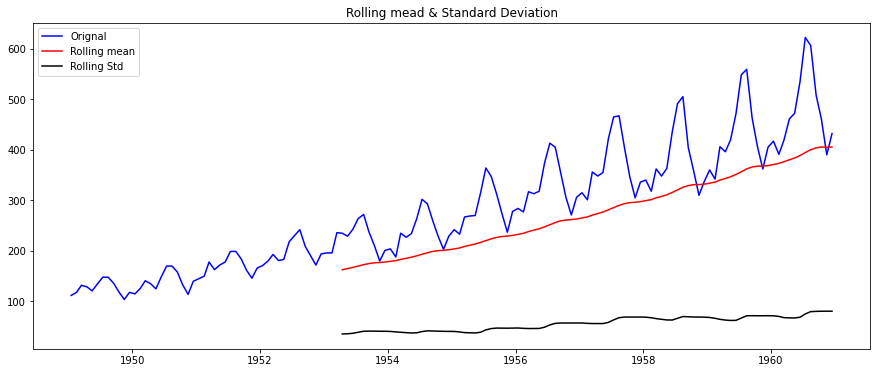

Result of Dickey-Fuller Test
Test Statistics                 0.815369
p-value                         0.991880
#Lags Used                     13.000000
Number of observation used    130.000000
Critical Value 1%              -3.481682
dtype: float64
Test Statistics                 0.815369
p-value                         0.991880
#Lags Used                     13.000000
Number of observation used    130.000000
Critical Value 1%              -3.481682
Critical Value 5%              -2.884042
dtype: float64
Test Statistics                 0.815369
p-value                         0.991880
#Lags Used                     13.000000
Number of observation used    130.000000
Critical Value 1%              -3.481682
Critical Value 5%              -2.884042
Critical Value 10%             -2.578770
dtype: float64


In [11]:
test_stationarity(data['#Passengers'])

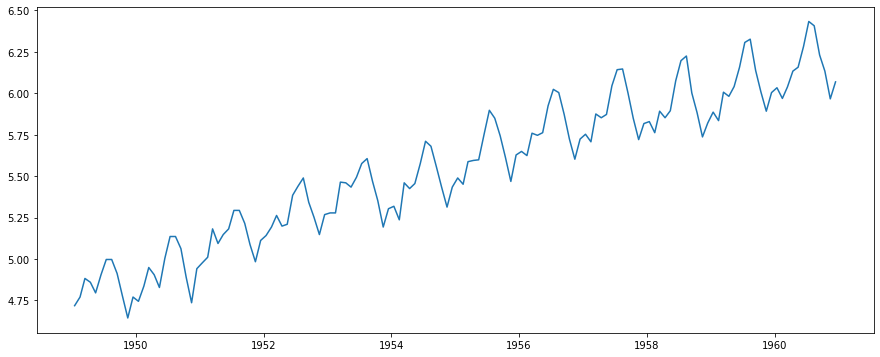

In [12]:
plt.plot(ts_log)

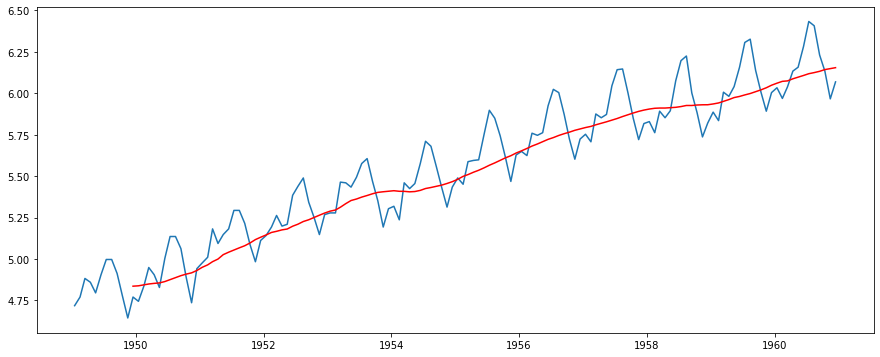

In [13]:
movingAverage = ts_log.rolling(window = 12).mean()
movingSTD = ts_log.rolling(window = 12).std()
plt.plot(ts_log)
plt.plot(movingAverage,color='red')

In [14]:
ts_logs_mv_diff = ts_log - movingAverage
ts_logs_mv_diff.head(12)

ts_logs_mv_diff.dropna(inplace = True)
ts_logs_mv_diff.head(10)

Month
1949-12-15   -0.065494
1950-01-15   -0.093449
1950-02-15   -0.007566
1950-03-15    0.099416
1950-04-15    0.052142
1950-05-15   -0.027529
1950-06-15    0.139881
1950-07-15    0.260184
1950-08-15    0.248635
1950-09-15    0.162937
Name: #Passengers, dtype: float64

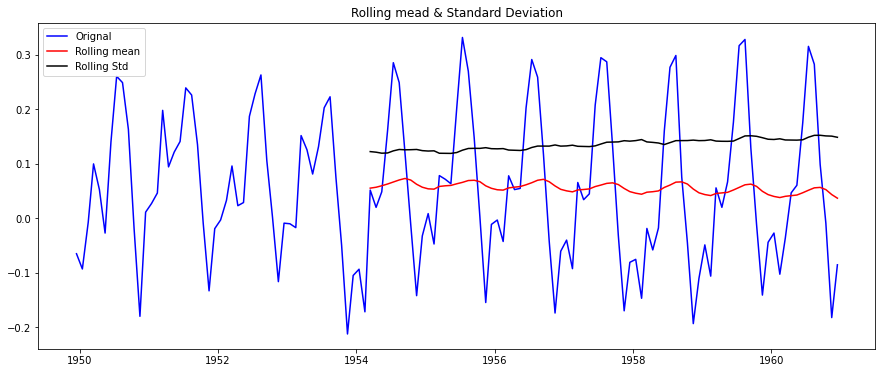

Result of Dickey-Fuller Test
Test Statistics                -3.162908
p-value                         0.022235
#Lags Used                     13.000000
Number of observation used    119.000000
Critical Value 1%              -3.486535
dtype: float64
Test Statistics                -3.162908
p-value                         0.022235
#Lags Used                     13.000000
Number of observation used    119.000000
Critical Value 1%              -3.486535
Critical Value 5%              -2.886151
dtype: float64
Test Statistics                -3.162908
p-value                         0.022235
#Lags Used                     13.000000
Number of observation used    119.000000
Critical Value 1%              -3.486535
Critical Value 5%              -2.886151
Critical Value 10%             -2.579896
dtype: float64


In [15]:
test_stationarity(ts_logs_mv_diff)

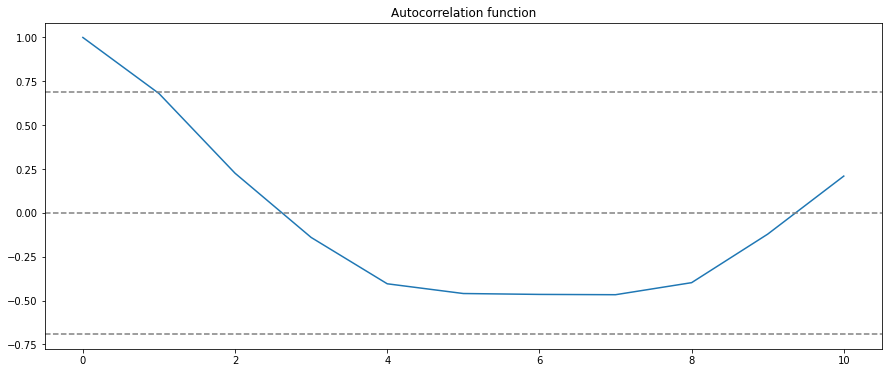

In [17]:
plt.plot(np.arange(0,11), acf (ts_logs_mv_diff, nlags = 10 ))
plt.axhline(y=0,linestyle = '--',color ='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_logs_mv_diff)),linestyle = '--',color ='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_logs_mv_diff)),linestyle = '--',color ='gray')            
plt.title('Autocorrelation function')
plt.show()

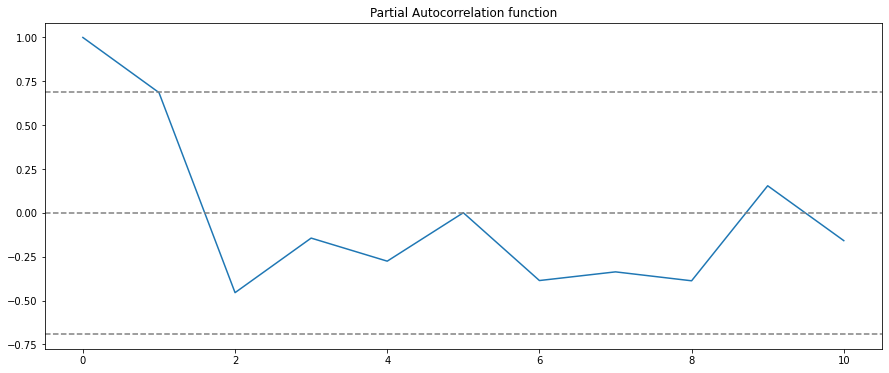

In [18]:
plt.plot(np.arange(0,11), pacf (ts_logs_mv_diff, nlags = 10 ))
plt.axhline(y=0,linestyle = '--',color ='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_logs_mv_diff)),linestyle = '--',color ='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_logs_mv_diff)),linestyle = '--',color ='gray')            
plt.title('Partial Autocorrelation function')
plt.show()

In [36]:
model = ARIMA(ts_log , order=(1,1,0))
result_ARIMA = model.fit(disp=-1)
plt.plot(ts_logs_mv_diff)
plt.plot(result_ARIMA.fittedvalues , color= 'red')
plt.title('RSS : % 4F'% sum((result_ARIMA.fittedvalues[1:]-ts_logs_mv_diff)**2))

TypeError: fit() got an unexpected keyword argument 'disp'